<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Kaggle_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

tf.config.run_functions_eagerly(True)

# Generate Data:

### 1. Install the Kaggle library

In [ ]:
pip install kaggle

### 2. Configure your Kaggle API key

Download your `kaggle.json` file from your Kaggle account (Profile -> Account -> Create New API Token).

Then, upload this file to your Colab environment in the directory `~/.kaggle/` and set the correct permissions.

In [ ]:
import os
from google.colab import files


# Upload kaggle.json
files.upload()


print("Kaggle API key configured successfully!")

Saving kaggle.json to kaggle.json
Kaggle API key configured successfully!


In [ ]:
# Create .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle
# Move the uploaded kaggle.json to the correct directory
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


### 3. Import `kagglehub` and download the dataset



In [ ]:
import kagglehub
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data
!unzip daily-climate-time-series-data.zip

Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 59.8MB/s]
Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


# Curating the Data:P

# Create our Model:

In [ ]:
Model = Sequential()
Model.add(Dense(128,input_dim=3,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.03)))
Model.add(Dropout(0.25))
Model.add(Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.03)))
Model.add(Dropout(0.25))
Model.add(Dense(1,activation="linear"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Enable nesterov=True within the SGD optimizer
optimizers = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

In [ ]:
Model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Model.compile(loss="binary_crossentropy",optimizer=optimizers,metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor="val_loss",
                   min_delta=0.00001,
                   patience=50,
                   verbose=1,
                   mode="auto",
                   baseline=None,
                   restore_best_weights=True,
                   )

In [ ]:
Model.compile(loss="mean_squared_error",optimizer=optimizers,metrics=['mae'])
history = Model.fit(X_train, y_train, epochs=1500, validation_data = (X_test,y_test),verbose=1,callbacks=ES)

Epoch 1/1500
 1/46 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 6738.2988 - mae: 68.0634

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/1500
 1/46 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: nan - mae: nan

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/1500
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/1500
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/1500
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/1500
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/1500
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/1500
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/1500
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/1500
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 11/1500
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/


KeyboardInterrupt



In [ ]:
# The 'plot_decision_regions' function is typically used for classification tasks with 2D data.
# Since we are performing a regression task with multiple features, this plot is not suitable.
# I will comment out this code and suggest an alternative visualization for regression results if needed.
# plot_decision_regions(X,y.astype('int'),clf=Model,legend=2)
# plt.xlim(-2,3)
# plt.xlim(-1.5,2)
# plt.show()

** I think using all these methods like Dropout, EarlyStopping and Regularization did make our model more accurate and saved time and computation and our model is more or less perfect fit

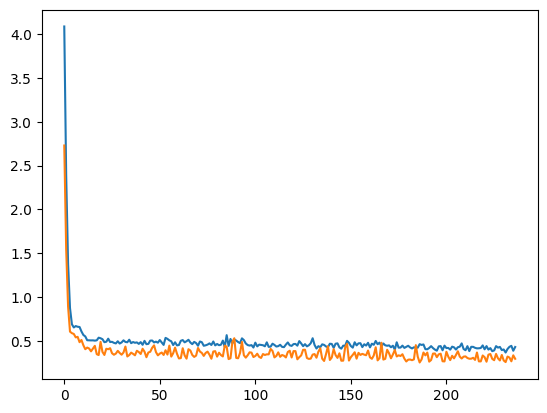

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

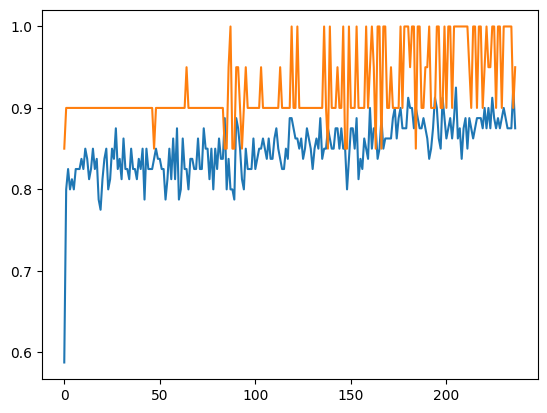

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])